### Our basic motivation here is to classify the videos based on their Category (ID) cased on the features we are provided with. I am going to proceed with the US Region Dataset and once the model is built I can replicate the same on the other country datasets.

## Initial Assumptions Made:

#### Our dataset contains 570 Null values. We assume that the data is missing completely at random (i.e., the events that lead to any particular data-item being missing are independent both of observable variables and of unobservable parameters of interest, and occur entirely at random. When data are MCAR, the analysis performed on the data is unbiased; however, data are rarely MCAR).

In [1]:
#Importing all necessary packages
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from pandas import read_excel, merge
from IPython.core.display import HTML
css_file = 'style.css'
from numpy import nan
import sklearn
#import plotly.graph_objs as go
#from plotly.offline import init_notebook_mode, iplot
#init_notebook_mode()
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sn
from scipy import stats
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
import pylab as pl
import matplotlib.patches as mpatches
%matplotlib inline
from sklearn.preprocessing import StandardScaler
import simplejson as json
from pandas.io.json import json_normalize

In [2]:
df=pd.read_csv('D:\\Springboard_Capstone2\\CapstoneDataset\\USvideos.csv')
df.head()

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
0,2kyS6SvSYSE,17.14.11,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,2017-11-13T17:13:01.000Z,SHANtell martin,748374,57527,2966,15954,https://i.ytimg.com/vi/2kyS6SvSYSE/default.jpg,False,False,False,SHANTELL'S CHANNEL - https://www.youtube.com/s...
1,1ZAPwfrtAFY,17.14.11,The Trump Presidency: Last Week Tonight with J...,LastWeekTonight,24,2017-11-13T07:30:00.000Z,"last week tonight trump presidency|""last week ...",2418783,97185,6146,12703,https://i.ytimg.com/vi/1ZAPwfrtAFY/default.jpg,False,False,False,"One year after the presidential election, John..."
2,5qpjK5DgCt4,17.14.11,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12T19:05:24.000Z,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146033,5339,8181,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,False,False,False,WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...
3,puqaWrEC7tY,17.14.11,Nickelback Lyrics: Real or Fake?,Good Mythical Morning,24,2017-11-13T11:00:04.000Z,"rhett and link|""gmm""|""good mythical morning""|""...",343168,10172,666,2146,https://i.ytimg.com/vi/puqaWrEC7tY/default.jpg,False,False,False,Today we find out if Link is a Nickelback amat...
4,d380meD0W0M,17.14.11,I Dare You: GOING BALD!?,nigahiga,24,2017-11-12T18:01:41.000Z,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095731,132235,1989,17518,https://i.ytimg.com/vi/d380meD0W0M/default.jpg,False,False,False,I know it's been a while since we did this sho...


#### Checking if there are any Null Values

In [3]:
print(df.isnull().sum())

video_id                    0
trending_date               0
title                       0
channel_title               0
category_id                 0
publish_time                0
tags                        0
views                       0
likes                       0
dislikes                    0
comment_count               0
thumbnail_link              0
comments_disabled           0
ratings_disabled            0
video_error_or_removed      0
description               570
dtype: int64


In [4]:
df.describe()

,category_id,views,likes,dislikes,comment_count
count,40949.000000,4.094900e+04,4.094900e+04,4.094900e+04,4.094900e+04
mean,19.972429,2.360785e+06,7.426670e+04,3.711401e+03,8.446804e+03
std,7.568327,7.394114e+06,2.288853e+05,2.902971e+04,3.743049e+04
min,1.000000,5.490000e+02,0.000000e+00,0.000000e+00,0.000000e+00
25%,17.000000,2.423290e+05,5.424000e+03,2.020000e+02,6.140000e+02
50%,24.000000,6.818610e+05,1.809100e+04,6.310000e+02,1.856000e+03
75%,25.000000,1.823157e+06,5.541700e+04,1.938000e+03,5.755000e+03
max,43.000000,2.252119e+08,5.613827e+06,1.674420e+06,1.361580e+06


## Doing a Normality Test on the Numerical Columns

C:\Users\User\Anaconda3\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools
C:\Users\User\Anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by the scale function.
  warnings.warn(msg, DataConversionWarning)


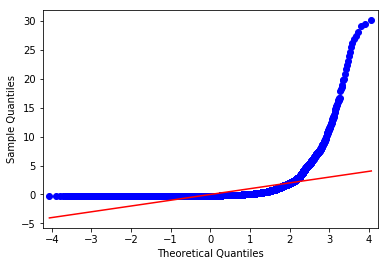

In [5]:
from sklearn import preprocessing
import numpy as np
import statsmodels.api as sm
import pylab


Full_Time_Four_Years=df['views'].values
X_scaled = preprocessing.scale(Full_Time_Four_Years)

sm.qqplot(X_scaled, line='s')
pylab.show()

##### The views dimension is not normally distributed

C:\Users\User\Anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by the scale function.
  warnings.warn(msg, DataConversionWarning)


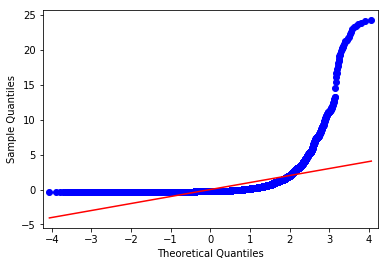

In [6]:
from sklearn import preprocessing
import numpy as np
import statsmodels.api as sm
import pylab


Full_Time_Four_Years=df['likes'].values
X_scaled = preprocessing.scale(Full_Time_Four_Years)

sm.qqplot(X_scaled, line='s')
pylab.show()

##### The likes dimension is not normally distributed

C:\Users\User\Anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by the scale function.
  warnings.warn(msg, DataConversionWarning)


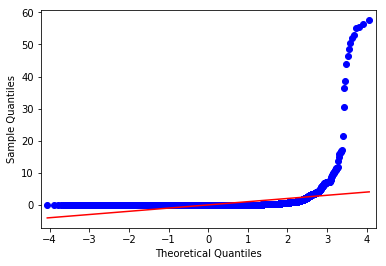

In [7]:
from sklearn import preprocessing
import numpy as np
import statsmodels.api as sm
import pylab


Full_Time_Four_Years=df['dislikes'].values
X_scaled = preprocessing.scale(Full_Time_Four_Years)

sm.qqplot(X_scaled, line='s')
pylab.show()

##### The likes dimension is not normally distributed

## Visual EDA

## How are the videos trending over time 

Text(0,0.5,'Count')

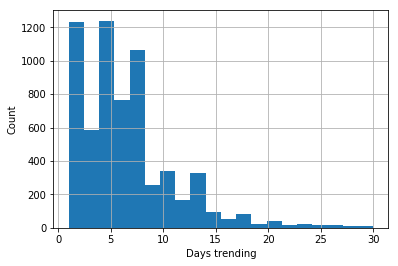

In [8]:
ax = df.groupby('video_id').size().hist(bins=20)
ax.set_xlabel('Days trending')
ax.set_ylabel('Count')

## What are the top trending videos by Category in US

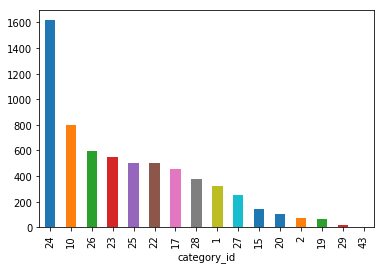

In [9]:
df.drop_duplicates('video_id', keep='first').groupby('category_id').size().sort_values(ascending=False).plot(kind='bar');

## Applying Natural Language Processing Techniques on Data

In [12]:
import nltk
from nltk.tokenize import word_tokenize,sent_tokenize
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import json
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import cm
from datetime import datetime
import glob
import seaborn as sns
import re
# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory
import os
# Any results you write to the current directory are saved as output.
2017-11-13T17:13:01.000Z
#nltk.download('punkt')

#### Setting the Data Format correctly

In [14]:
df['trending_date'] = pd.to_datetime(df['trending_date'], format='%y.%d.%m')
df['publish_time'] = pd.to_datetime(df['publish_time'], format='%Y-%m-%dT%H:%M:%S.%fZ')

# separates date and time into two columns from 'publish_time' column

df.insert(4, 'publish_date', df['publish_time'].dt.date)
df['publish_time'] = df['publish_time'].dt.time
df['publish_date']=pd.to_datetime(df['publish_date'])

#### Checking the correlation between likes, dislikes, comments, and views lets plot a correlation matrix

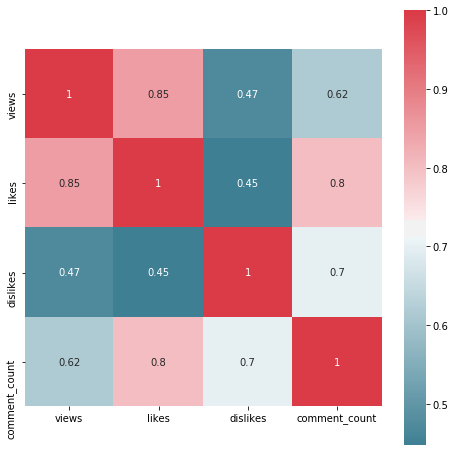

In [16]:
columns_show=['views', 'likes', 'dislikes', 'comment_count']
f, ax = plt.subplots(figsize=(8, 8))
corr = df[columns_show].corr()
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True, ax=ax,annot=True)

##### In the above matrix, for USA dataset, the columns with :-

##### High Correlation - Views and Likes,, Comment_count and Dislikes
##### Medium Correlation - Views and Dislikes, Views and Comment_Count, Likes and Comment_Count
##### Low Correlation - Likes and Dislike

### Which video trended on maximum days and what is the title, likes, dislikes, comments, and views.

Text(0.5,1,'Top 5 Videos that trended maximum days in USA')

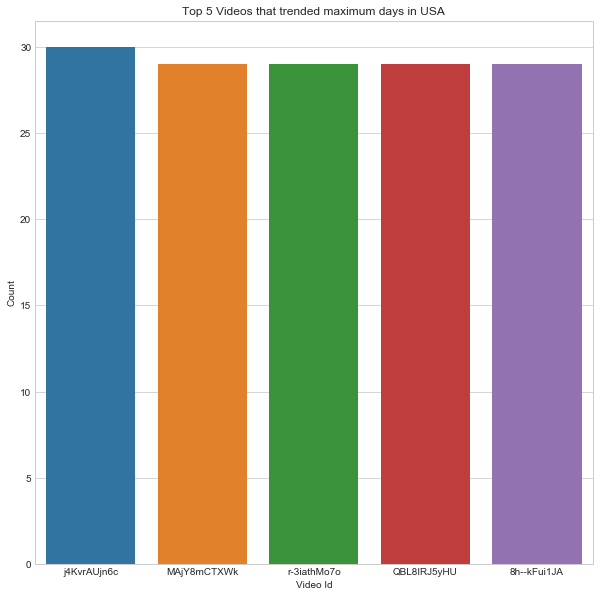

In [18]:
df_usa_which_video_trended_maximum_days=df.groupby(by=['video_id'],as_index=False).count().sort_values(by='title',ascending=False).head()

plt.figure(figsize=(10,10))
sns.set_style("whitegrid")
ax = sns.barplot(x=df_usa_which_video_trended_maximum_days['video_id'],y=df_usa_which_video_trended_maximum_days['trending_date'], data=df_usa_which_video_trended_maximum_days)
plt.xlabel("Video Id")
plt.ylabel("Count")
plt.title("Top 5 Videos that trended maximum days in USA")

### Top 5 Trending Channel in USA

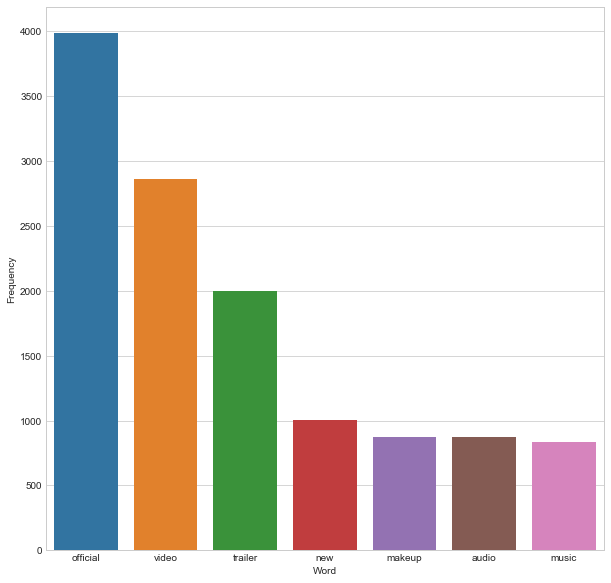

In [26]:
from collections import Counter
from nltk.tokenize import RegexpTokenizer
from stop_words import get_stop_words
import re

top_N = 100
#convert list of list into text
#a=''.join(str(r) for v in df_usa['title'] for r in v)

a = df['title'].str.lower().str.cat(sep=' ')

# removes punctuation,numbers and returns list of words
b = re.sub('[^A-Za-z]+', ' ', a)

#remove all the stopwords from the text
stop_words = list(get_stop_words('en'))         
nltk_words = list(stopwords.words('english'))   
stop_words.extend(nltk_words)

word_tokens = word_tokenize(b)
filtered_sentence = [w for w in word_tokens if not w in stop_words]
filtered_sentence = []
for w in word_tokens:
    if w not in stop_words:
        filtered_sentence.append(w)

# Remove characters which have length less than 2  
without_single_chr = [word for word in filtered_sentence if len(word) > 2]

# Remove numbers
cleaned_data_title = [word for word in without_single_chr if not word.isnumeric()]        

# Calculate frequency distribution
word_dist = nltk.FreqDist(cleaned_data_title)
rslt = pd.DataFrame(word_dist.most_common(top_N),
                    columns=['Word', 'Frequency'])

plt.figure(figsize=(10,10))
sns.set_style("whitegrid")
ax = sns.barplot(x="Word",y="Frequency", data=rslt.head(7))

In [29]:
from wordcloud import WordCloud
import nltk
from nltk.corpus import stopwords
from nltk import sent_tokenize, word_tokenize
from wordcloud import WordCloud, STOPWORDS

def wc(data,bgcolor,title):
    plt.figure(figsize = (100,100))
    wc = WordCloud(background_color = bgcolor, max_words = 1000,  max_font_size = 50)
    wc.generate(' '.join(data))
    plt.imshow(wc)
    plt.axis('off')

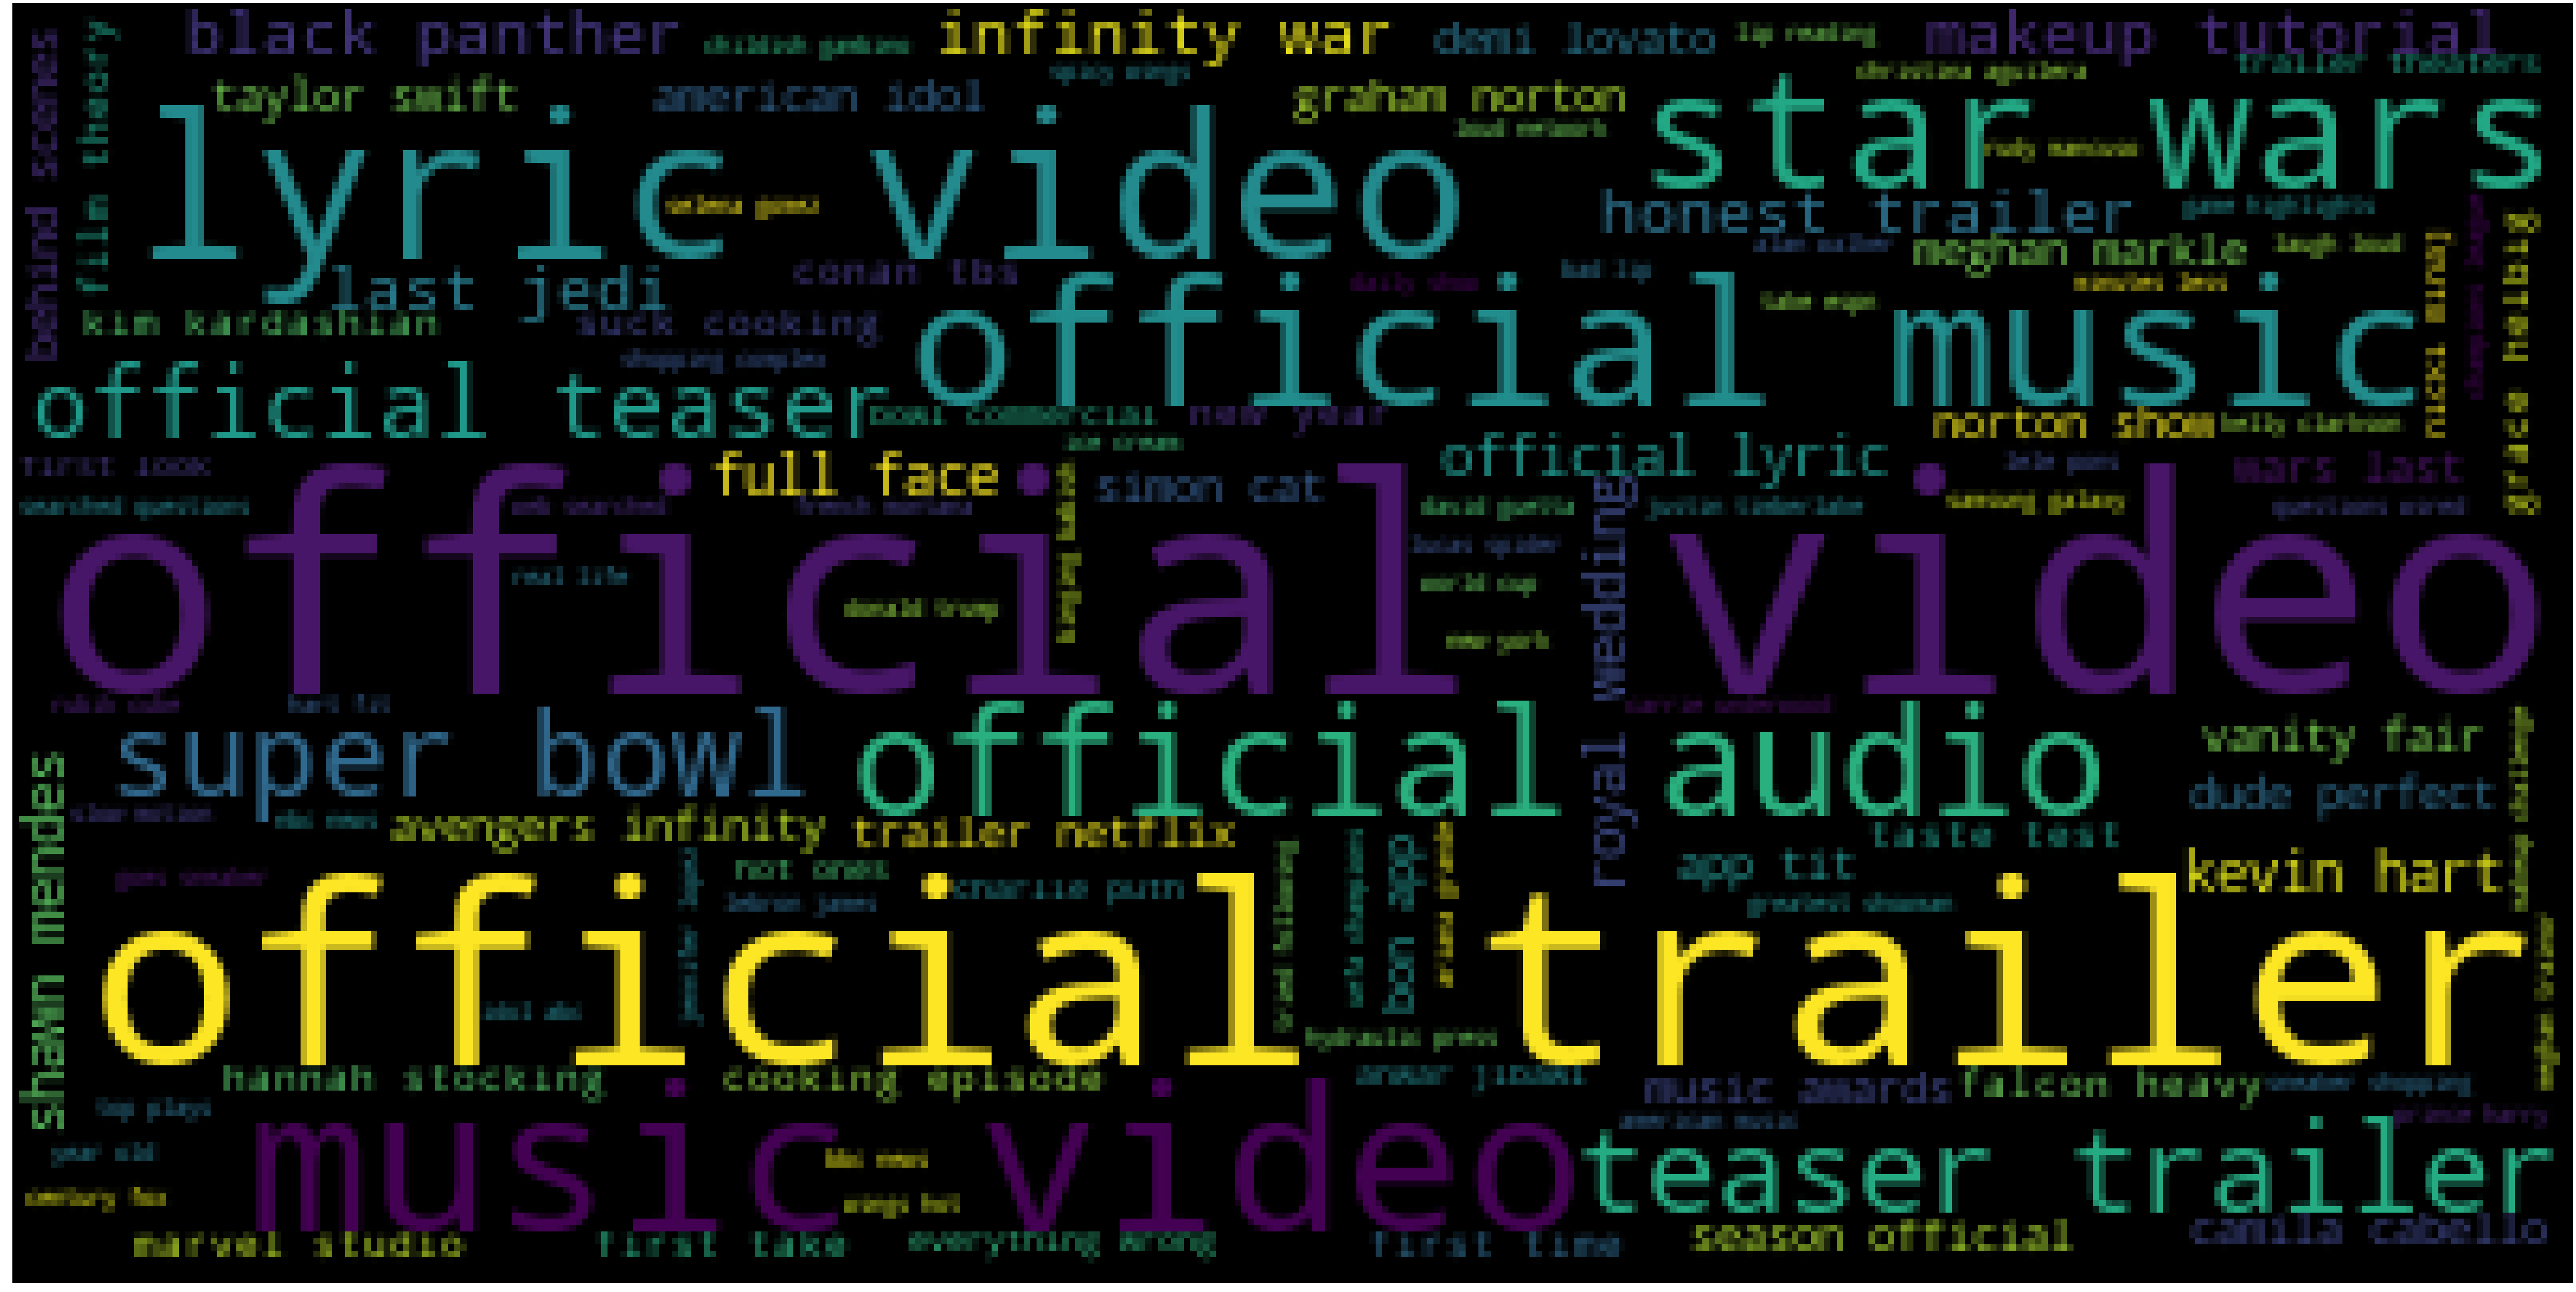

In [30]:
wc(cleaned_data_title,'black','Common Words' )